In [ ]:
!pip install pandas-ta
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader 
!pip install sklearn
!pip install tensorflow
!pip install --upgrade nsepy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np 
import pandas as pd 
from datetime import timedelta, datetime, date
import matplotlib.pyplot as plt
import pandas_datareader as web 
import pandas_ta as ta

In [ ]:
today = date.today()
date_today = today.strftime("%Y-%m-%d")
date_start = '2010-01-01'

In [ ]:
stockname = 'AAPL' #input("Enter stock symbol: ")
df = web.DataReader(stockname ,'yahoo' ,start=date_start, end=date_today)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.535085
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.546384
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.442255
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.430346
2010-01-08,7.571429,7.466429,7.510714,7.570714,447610800.0,6.473095


In [ ]:
k = df['Close'].ewm(span=12, adjust=False, min_periods=12).mean()
d = df['Close'].ewm(span=26, adjust=False, min_periods=26).mean()

macd = k - d 
macd_s = macd.ewm(span=9, adjust=False, min_periods=9).mean()

In [ ]:
df['macd'] = df.index.map(macd)
df['macd_s'] = df.index.map(macd_s)
df.head(50)

,High,Low,Open,Close,Volume,Adj Close,macd,macd_s
Date,,,,,,,,
2010-01-04,7.660714,7.585000,7.622500,7.643214,4.937296e+08,6.535085,NaN,NaN
2010-01-05,7.699643,7.616071,7.664286,7.656429,6.019048e+08,6.546384,NaN,NaN
2010-01-06,7.686786,7.526786,7.656429,7.534643,5.521600e+08,6.442255,NaN,NaN
2010-01-07,7.571429,7.466071,7.562500,7.520714,4.771312e+08,6.430346,NaN,NaN
2010-01-08,7.571429,7.466429,7.510714,7.570714,4.476108e+08,6.473095,NaN,NaN
2010-01-11,7.607143,7.444643,7.600000,7.503929,4.622296e+08,6.415993,NaN,NaN
2010-01-12,7.491786,7.372143,7.471071,7.418571,5.944596e+08,6.343009,NaN,NaN
2010-01-13,7.533214,7.289286,7.423929,7.523214,6.058920e+08,6.432483,NaN,NaN
2010-01-14,7.516429,7.465000,7.503929,7.479643,4.328940e+08,6.395227,NaN,NaN


In [ ]:
df['14-MA'] = df['Close'].rolling(14).mean() 
df['5-MA'] = df['Close'].rolling(5).mean()    

In [ ]:
df['Price_Osc']=(df['14-MA']-df['5-MA'])/df['14-MA']

In [ ]:
df['RSI']= ta.rsi(df['Close'], length = 14)

In [ ]:
d = pd.to_datetime(df.index)
df['Month'] = d.strftime("%m")
df['Year'] = d.strftime("%Y")

In [ ]:
pvo=ta.pvo(df['Volume'])
pvo=pvo['PVO_12_26_9']
df['PVO']=pvo
df.head(50)

In [ ]:
df = df.iloc[33:]
df.head()

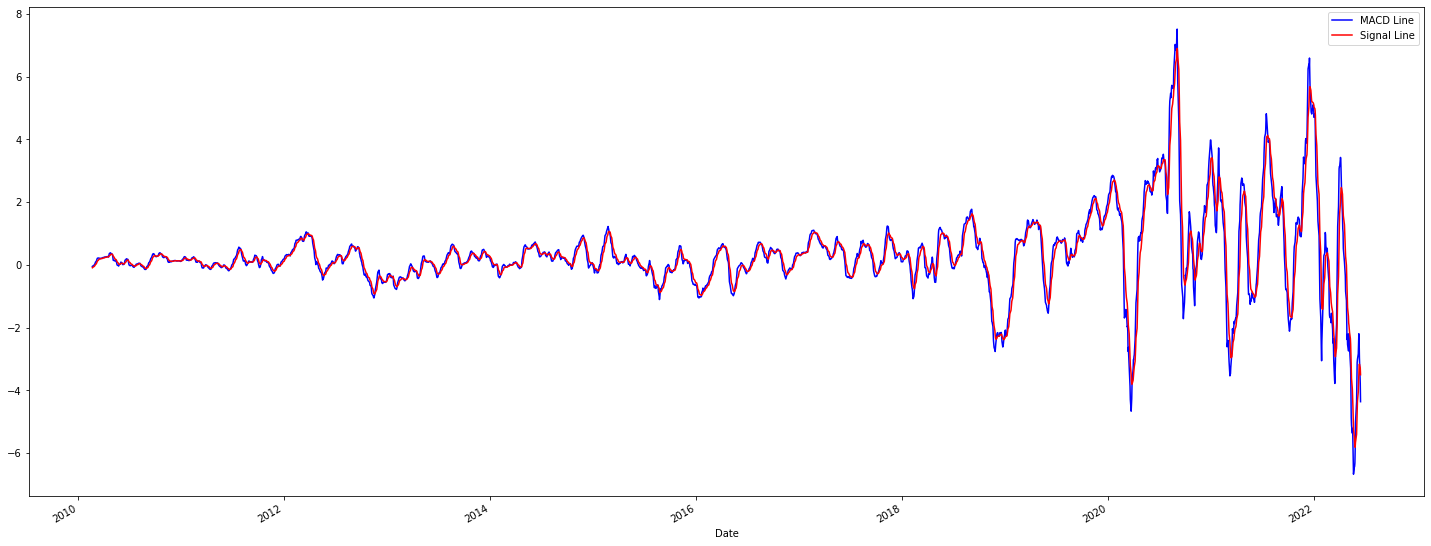

In [ ]:
df['macd'].plot(label = 'MACD Line', figsize = (25,10), color = 'b')
df['macd_s'].plot(label = 'Signal Line', color = 'r')
plt.legend()

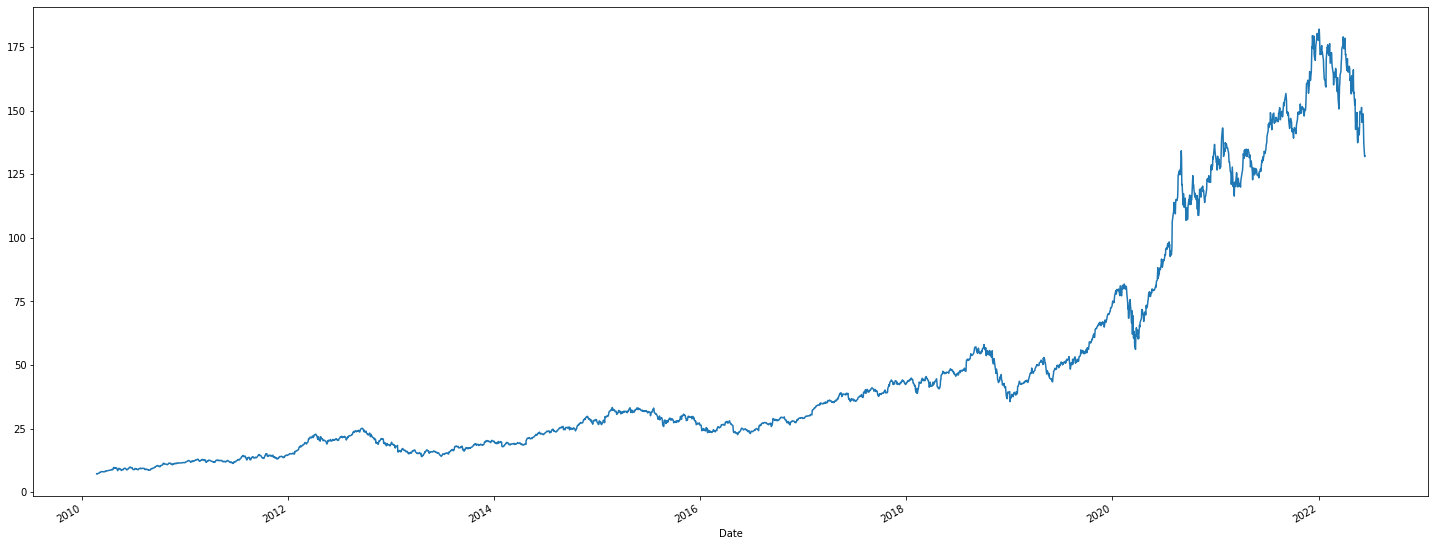

In [ ]:
df['Close'].plot(label = 'Close price', figsize = (25,10)) 

In [ ]:
FEATURES = ['High','Low', 'Price_Osc', 'RSI', 'macd', 'PVO']
print('FEATURE LIST')
print([f for f in FEATURES]) 

FEATURE LIST
['High', 'Low', 'Price_Osc', 'RSI', 'macd', 'PVO']


In [ ]:
train_df = df.sort_values(by=['Date']).copy()

In [ ]:
date_index = train_df.index
print(date_index)
train_df = train_df.reset_index(drop=True).copy() 

DatetimeIndex(['2010-02-22', '2010-02-23', '2010-02-24', '2010-02-25',
               '2010-02-26', '2010-03-01', '2010-03-02', '2010-03-03',
               '2010-03-04', '2010-03-05',
               ...
               '2022-06-01', '2022-06-02', '2022-06-03', '2022-06-06',
               '2022-06-07', '2022-06-08', '2022-06-09', '2022-06-10',
               '2022-06-13', '2022-06-14'],
              dtype='datetime64[ns]', name='Date', length=3101, freq=None)


In [ ]:
train_df.head(5)

,High,Low,Open,Close,Volume,Adj Close,macd,macd_s,14-MA,5-MA,Price_Osc,RSI,Month,Year,PVO
0,7.232143,7.113929,7.226429,7.157857,390563600.0,6.120095,-0.052874,-0.094309,7.086862,7.221214,-0.018958,47.617442,02,2010,-13.454282
1,7.190357,6.989643,7.142857,7.037857,575094800.0,6.017494,-0.058240,-0.087095,7.089923,7.175929,-0.012131,43.102673,02,2010,-12.143491
2,7.194286,7.065714,7.079643,7.166429,460566400.0,6.127425,-0.051523,-0.079981,7.093571,7.162429,-0.009707,48.713452,02,2010,-12.618776
3,7.245000,7.031786,7.049286,7.214286,665126000.0,6.168344,-0.041856,-0.072356,7.118954,7.155786,-0.005174,50.663657,02,2010,-9.932171
4,7.327500,7.214286,7.227857,7.307857,507460800.0,6.248350,-0.026341,-0.063153,7.142321,7.176857,-0.004835,54.321085,02,2010,-9.946532


In [ ]:
data = pd.DataFrame(train_df)
data_filtered = data[FEATURES]

data_filtered_ext = data_filtered.copy()

In [ ]:
data_filtered_ext.head(5)

,High,Low,Price_Osc,RSI,macd,PVO
0,7.232143,7.113929,-0.018958,47.617442,-0.052874,-13.454282
1,7.190357,6.989643,-0.012131,43.102673,-0.058240,-12.143491
2,7.194286,7.065714,-0.009707,48.713452,-0.051523,-12.618776
3,7.245000,7.031786,-0.005174,50.663657,-0.041856,-9.932171
4,7.327500,7.214286,-0.004835,54.321085,-0.026341,-9.946532


In [ ]:
nrows = data_filtered.shape[0]
np_data_unscaled = np.array(data_filtered)
np_data = np.reshape(np_data_unscaled, (nrows, -1))
print(np_data.shape)

(3101, 6)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
np_data_scaled = scaler.fit_transform(np_data_unscaled)

# Creating a separate scaler that works on a single column for scaling predictions
scaler_pred = MinMaxScaler()
df_Close = pd.DataFrame(train_df['Close'])
np_Close_scaled = scaler_pred.fit_transform(df_Close)

In [ ]:
import math
sequence_length = 50
index_Close = data.columns.get_loc("Close")
train_data_len = math.ceil(np_data_scaled.shape[0] * 0.8)

In [ ]:
train_data = np_data_scaled[0:train_data_len, :]
test_data = np_data_scaled[train_data_len - sequence_length:, :]

In [ ]:
close_train = np_Close_scaled[0:train_data_len]
close_test =  np_Close_scaled[train_data_len - sequence_length:]              

In [ ]:
# Here, we create N samples, sequence_length time steps per sample, and 6 features
def partition_dataset_x(sequence_length, data):
    x = []
    data_len = data.shape[0]
    for i in range(sequence_length, data_len):
        x.append(data[i-sequence_length:i,:]) #contains sequence_length values 0-sequence_length * columns
        
    # Convert the x and y to numpy arrays
    x = np.array(x)
    return x

# Generate training data and test data
x_train = partition_dataset_x(sequence_length, train_data)
x_test = partition_dataset_x(sequence_length, test_data)

In [ ]:
def partition_dataset_y(sequence_length, data):
    y = []
    data_len = data.shape[0]
    for i in range(sequence_length, data_len):
        y.append(data[i, 0]) #contains sequence_length values 0-sequence_length * columns
        
    y = np.array(y)
    return y

y_train = partition_dataset_y(sequence_length, close_train)
y_test = partition_dataset_y(sequence_length, close_test)

In [ ]:
# Print the shapes: the result is: (rows, training_sequence, features) (prediction value, )
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(2431, 50, 6) (2431,)
(620, 50, 6) (620,)


In [ ]:
x_train

array([[[2.37757049e-04, 7.22044058e-04, 4.02844512e-01, 3.83303170e-01,
         4.66717623e-01, 1.56108536e-01],
        [0.00000000e+00, 0.00000000e+00, 4.40086933e-01, 3.18227505e-01,
         4.66339360e-01, 1.80867211e-01],
        [2.23537370e-05, 4.41937082e-04, 4.53307721e-01, 3.99101003e-01,
         4.66812855e-01, 1.71889862e-01],
        ...,
        [1.39545055e-02, 1.37561851e-02, 2.70445694e-01, 7.60755176e-01,
         4.96427183e-01, 5.37813908e-01],
        [1.40703358e-02, 1.35466298e-02, 3.41577109e-01, 6.05657384e-01,
         4.95018917e-01, 5.03280868e-01],
        [1.35237043e-02, 1.39366919e-02, 3.92008960e-01, 6.58180781e-01,
         4.94692004e-01, 4.53054225e-01]],

       [[0.00000000e+00, 0.00000000e+00, 4.40086933e-01, 3.18227505e-01,
         4.66339360e-01, 1.80867211e-01],
        [2.23537370e-05, 4.41937082e-04, 4.53307721e-01, 3.99101003e-01,
         4.66812855e-01, 1.71889862e-01],
        [3.10912021e-04, 2.44831127e-04, 4.78036124e-01, 4.272111

In [ ]:
from keras.models import Sequential # Deep learning library, used for neural networks
from keras.layers import LSTM, Dense, Dropout # Deep learning classes for recurrent and regular densely-connected layers
from keras.callbacks import EarlyStopping 

# Configure the neural network model
model = Sequential()

# Model with n_neurons = inputshape Timestamps, each with x_train.shape[2] variables
n_neurons = x_train.shape[1] * x_train.shape[2]

print(n_neurons, x_train.shape[1], x_train.shape[2])
model.add(LSTM(n_neurons, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2]))) 
model.add(LSTM(n_neurons, return_sequences=False))
model.add(Dense(6))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Training the model
epochs = 50
batch_size = 16
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)
history = model.fit(x_train, y_train, 
                    batch_size=batch_size, 
                    epochs=epochs,
                    validation_data=(x_test, y_test)
                   )

300 50 6
Epoch 1/50
152/152 [==============================] - 75s 471ms/step - loss: 0.0047 - val_loss: 9.0913e-04
Epoch 2/50
152/152 [==============================] - 51s 333ms/step - loss: 2.7374e-05 - val_loss: 8.8415e-04
Epoch 3/50
152/152 [==============================] - 51s 338ms/step - loss: 2.3815e-05 - val_loss: 8.5766e-04
Epoch 4/50
152/152 [==============================] - 52s 342ms/step - loss: 2.2653e-05 - val_loss: 7.2917e-04
Epoch 5/50
152/152 [==============================] - 51s 334ms/step - loss: 2.6263e-05 - val_loss: 7.4449e-04
Epoch 6/50
152/152 [==============================] - 52s 340ms/step - loss: 2.4748e-05 - val_loss: 7.8329e-04
Epoch 7/50
152/152 [==============================] - 53s 348ms/step - loss: 2.5302e-05 - val_loss: 6.3855e-04
Epoch 8/50
152/152 [==============================] - 53s 348ms/step - loss: 2.3053e-05 - val_loss: 8.8930e-04
Epoch 9/50
152/152 [==============================] - 53s 346ms/step - loss: 2.2660e-05 - val_loss: 6.9191e

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 50, 300)           368400    
                                                                 
 lstm_5 (LSTM)               (None, 300)               721200    
                                                                 
 dense_4 (Dense)             (None, 6)                 1806      
                                                                 
 dense_5 (Dense)             (None, 1)                 7         
                                                                 
Total params: 1,091,413
Trainable params: 1,091,413
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Get the predicted values
y_pred_scaled = model.predict(x_test)

# Unscale the predicted values
y_pred = scaler_pred.inverse_transform(y_pred_scaled)
y_test_unscaled = scaler_pred.inverse_transform(y_test.reshape(-1, 1))
newdf = pd.DataFrame()

newdf['Prediction']=y_pred.ravel()
newdf['Actual'] = y_test_unscaled.ravel()

newdf['Date']=date_index[train_data_len:]

In [ ]:
newdf.head()

,Prediction,Actual,Date
0,73.592888,72.879997,2019-12-30
1,73.857422,73.412498,2019-12-31
2,74.332443,75.087502,2020-01-02
3,75.557014,74.357498,2020-01-03
4,75.094627,74.949997,2020-01-06


Text(0.5, 1.0, 'APPLE PRICE CURVE')

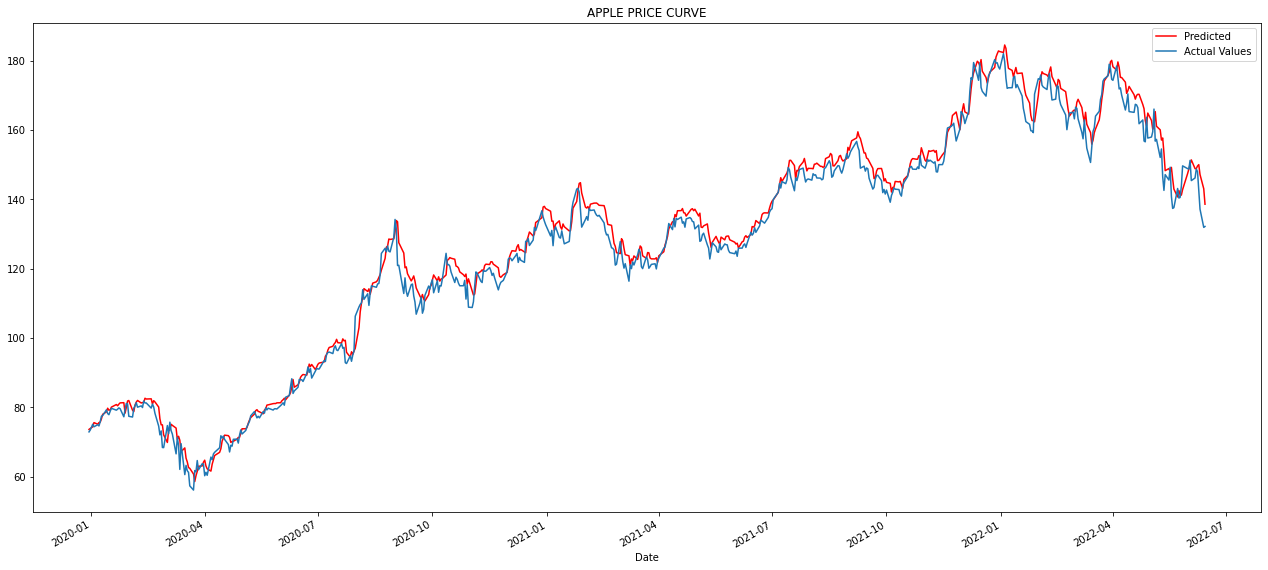

In [ ]:
ax = plt.gca() 
newdf.plot(kind='line',x='Date',y='Prediction',label ='Predicted',color='red',ax=ax,figsize=(22,10))
newdf.plot(kind='line',x='Date',y='Actual',label ='Actual Values',ax=ax)
plt.title('APPLE PRICE CURVE')

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error 

# Mean Absolute Error (MAE)
MAE = mean_absolute_error(y_test_unscaled, y_pred)
print(f'Mean Absolute Error (MAE): {np.round(MAE, 2)}')

# Mean Absolute Percentage Error (MAPE)
MAPE = np.mean((np.abs(np.subtract(y_test_unscaled, y_pred)/ y_test_unscaled))) * 100
print(f'Mean Absolute Percentage Error (MAPE): {np.round(MAPE, 2)} %')

# Median Absolute Percentage Error (MDAPE)
MDAPE = np.median((np.abs(np.subtract(y_test_unscaled, y_pred)/ y_test_unscaled)) ) * 100
print(f'Median Absolute Percentage Error (MDAPE): {np.round(MDAPE, 2)} %')

Mean Absolute Error (MAE): 2.82
Mean Absolute Percentage Error (MAPE): 2.29 %
Median Absolute Percentage Error (MDAPE): 1.88 %


In [ ]:
df_temp = df[-sequence_length:]
new_df = df_temp.filter(FEATURES)
today = date.today()
N = sequence_length

# Get the last N day closing price values and scale the data to be values between 0 and 1
last_N_days = new_df[-sequence_length:].values
last_N_days_scaled = scaler.transform(last_N_days)

# Create an empty list and Append past N days
X_test_new = []
X_test_new.append(last_N_days_scaled)

# Convert the X_test data set to a numpy array and reshape the data
pred_price_scaled = model.predict(np.array(X_test_new))
pred_price_unscaled = scaler_pred.inverse_transform(pred_price_scaled.reshape(-1, 1))

# Print last price and predicted price for the next day
price_today = np.round(df_temp['Close'][-1], 2)
predicted_price = np.round(pred_price_unscaled.ravel()[0], 2)
change_percent = np.round(100 - (price_today * 100)/predicted_price, 2)

plus = '+'; minus = ''
print(f'The close price for {stockname} at {today} is {price_today}')
print(f'The predicted close price is {predicted_price} ({plus if change_percent > 0 else minus}{change_percent}%)')

The close price for AAPL at 2022-06-14 is 132.15
The predicted close price is 136.47999572753906 (+3.17%)


In [ ]:
# Pearson Correlation Coefficient
from scipy import stats
stats.pearsonr(y_test_unscaled.ravel(), y_pred.ravel()) 

(0.9959956166557996, 0.0)